# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [11]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[4], verbose=True)

Training/Valid data shape: (234, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.45163
	Train loss: 0.04441, Accuracy: 51/187 (27.27%)
	Validation loss: 0.02963, Accuracy: 9/47 (19.15%)
	Test loss: 0.02831, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.31634
	Train loss: 0.04414, Accuracy: 62/187 (33.16%)
	Validation loss: 0.03002, Accuracy: 10/47 (21.28%)
	Test loss: 0.02934, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.36708
	Train loss: 0.04389, Accuracy: 63/187 (33.69%)
	Validation loss: 0.03012, Accuracy: 11/47 (23.40%)
	Test loss: 0.03015, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.31952
	Train loss: 0.04392, Accuracy: 56/187 (29.95%)
	Validation loss: 0.02996, Accuracy: 11/47 (23.40%)
	Test loss: 0.03022, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.38468
	Train loss: 0.04409, Accuracy: 56/187 (29.95%)
	Validation loss: 0.03030, Accuracy: 11/47 (23.40%)
	Test loss: 0.03054, 

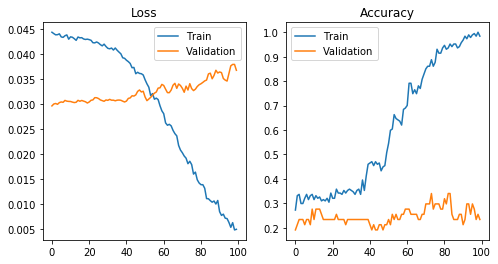

In [14]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.39976
	Train loss: 0.04440, Accuracy: 46/187 (24.60%)
	Validation loss: 0.02957, Accuracy: 12/47 (25.53%)
	Test loss: 0.02807, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.36773
	Train loss: 0.04438, Accuracy: 60/187 (32.09%)
	Validation loss: 0.02957, Accuracy: 10/47 (21.28%)
	Test loss: 0.02822, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.42190
	Train loss: 0.04437, Accuracy: 53/187 (28.34%)
	Validation loss: 0.02957, Accuracy: 12/47 (25.53%)
	Test loss: 0.02809, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.29849
	Train loss: 0.04422, Accuracy: 59/187 (31.55%)
	Validation loss: 0.02959, Accuracy: 8/47 (17.02%)
	Test loss: 0.02812, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.33295
	Train loss: 0.04385, Accuracy: 61/187 (32.62%)
	Validation loss: 0.02971, Accuracy: 8/47 (17.02%)
	Test loss: 0.02812, A

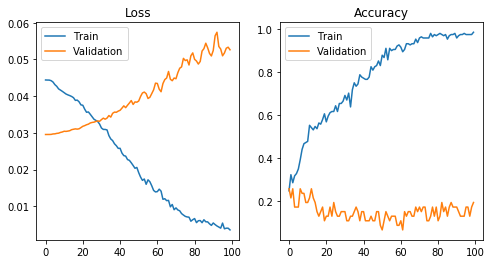

In [15]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.34967
	Train loss: 0.04457, Accuracy: 51/187 (27.27%)
	Validation loss: 0.02952, Accuracy: 7/47 (14.89%)
	Test loss: 0.02767, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.30550
	Train loss: 0.04425, Accuracy: 57/187 (30.48%)
	Validation loss: 0.02958, Accuracy: 10/47 (21.28%)
	Test loss: 0.02769, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.29170
	Train loss: 0.04370, Accuracy: 65/187 (34.76%)
	Validation loss: 0.02960, Accuracy: 11/47 (23.40%)
	Test loss: 0.02778, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.34827
	Train loss: 0.04307, Accuracy: 71/187 (37.97%)
	Validation loss: 0.02949, Accuracy: 13/47 (27.66%)
	Test loss: 0.02829, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.36099
	Train loss: 0.04262, Accuracy: 70/187 (37.43%)
	Validation loss: 0.02957, Accuracy: 14/47 (29.79%)
	Test loss: 0.0287

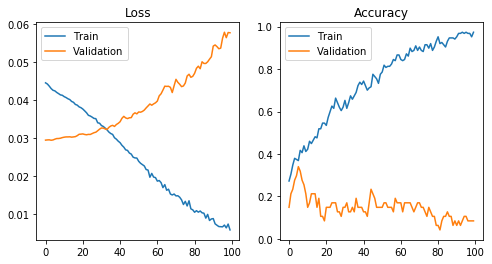

In [16]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.39607
	Train loss: 0.04453, Accuracy: 43/187 (22.99%)
	Validation loss: 0.02950, Accuracy: 13/47 (27.66%)
	Test loss: 0.02769, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.39098
	Train loss: 0.04447, Accuracy: 53/187 (28.34%)
	Validation loss: 0.02951, Accuracy: 15/47 (31.91%)
	Test loss: 0.02777, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.38932
	Train loss: 0.04442, Accuracy: 55/187 (29.41%)
	Validation loss: 0.02952, Accuracy: 11/47 (23.40%)
	Test loss: 0.02786, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.38603
	Train loss: 0.04438, Accuracy: 55/187 (29.41%)
	Validation loss: 0.02954, Accuracy: 11/47 (23.40%)
	Test loss: 0.02795, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.38489
	Train loss: 0.04435, Accuracy: 55/187 (29.41%)
	Validation loss: 0.02956, Accuracy: 11/47 (23.40%)
	Test loss: 0.02804

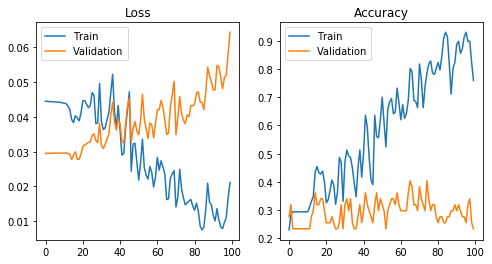

In [17]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.38706
	Train loss: 0.04458, Accuracy: 43/187 (22.99%)
	Validation loss: 0.02963, Accuracy: 11/47 (23.40%)
	Test loss: 0.02762, Accuracy: 17/50 (34.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.37191
	Train loss: 0.04442, Accuracy: 43/187 (22.99%)
	Validation loss: 0.02960, Accuracy: 11/47 (23.40%)
	Test loss: 0.02777, Accuracy: 17/50 (34.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.37905
	Train loss: 0.04435, Accuracy: 57/187 (30.48%)
	Validation loss: 0.02958, Accuracy: 12/47 (25.53%)
	Test loss: 0.02791, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.37558
	Train loss: 0.04425, Accuracy: 56/187 (29.95%)
	Validation loss: 0.02959, Accuracy: 11/47 (23.40%)
	Test loss: 0.02800, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.37955
	Train loss: 0.04417, Accuracy: 57/187 (30.48%)
	Validation loss: 0.02961, Accuracy: 11/47 (23.40%)
	Test loss: 0.02805

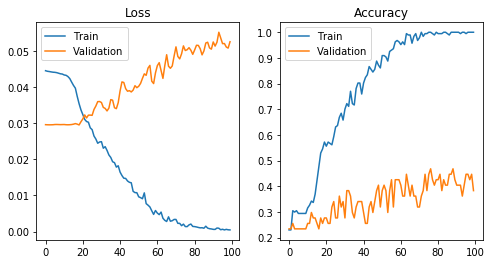

In [18]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)